<a href="https://colab.research.google.com/github/athabrani/DeepLearning/blob/main/02_Regression_Seconhand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Dataset

In [2]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/secondhanddataset.csv"
data = pd.read_csv(url)


In [3]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [5]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [6]:
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


# Pre-Processing Data

In [7]:
X = data.drop('current price', axis=1)
y = data['current price'].values.reshape(-1, 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# PyTorch Model

In [10]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [11]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Lapisan pertama dengan 128 neuron
        self.fc2 = nn.Linear(128, 64)  # Lapisan kedua dengan 64 neuron
        self.fc3 = nn.Linear(64, 1)  # Lapisan output (tanpa aktivasi karena regresi)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Aktivasi ReLU untuk lapisan pertama
        x = torch.relu(self.fc2(x))  # Aktivasi ReLU untuk lapisan kedua
        x = self.fc3(x)  # Output tanpa aktivasi
        return x

In [12]:
input_dim = X_train_tensor.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [13]:
batch_size = 32  # Ukuran batch untuk setiap iterasi pelatihan
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

y_pred = []
y_actual = []

epochs = 100  # Jumlah iterasi pelatihan
for epoch in range(epochs):
    model.train()  # Mengaktifkan mode pelatihan
    epoch_loss = 0  # Menyimpan akumulasi loss per epoch

    for batch_X, batch_y in train_loader:  # Iterasi melalui batch dalam DataLoader
        optimizer.zero_grad()  # Reset gradien sebelum backpropagation
        outputs = model(batch_X)  # Prediksi dari model
        loss = criterion(outputs, batch_y)  # Hitung loss
        y_pred.extend(outputs.detach().numpy().flatten())
        y_actual.extend(batch_y.numpy().flatten())
        loss.backward()  # Backpropagation
        optimizer.step()  # Update bobot model
        epoch_loss += loss.item()  # Simpan total loss

    # Tampilkan loss setiap 10 epoch
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}')

Epoch [10/100], Loss: 0.1523
Epoch [20/100], Loss: 0.0185
Epoch [30/100], Loss: 0.0106
Epoch [40/100], Loss: 0.0067
Epoch [50/100], Loss: 0.0048
Epoch [60/100], Loss: 0.0037
Epoch [70/100], Loss: 0.0031
Epoch [80/100], Loss: 0.0027
Epoch [90/100], Loss: 0.0023
Epoch [100/100], Loss: 0.0020


In [14]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = criterion(y_pred, y_test_tensor)
    rmse = torch.sqrt(mse)


    y_pred_original = scaler.inverse_transform(y_pred.numpy())
    y_test_original = scaler.inverse_transform(y_test_tensor.numpy())


    y_mean = np.mean(y_test_original)
    ss_total = np.sum((y_test_original - y_mean) ** 2)  # Total Variasi
    ss_res = np.sum((y_test_original - y_pred_original) ** 2)  # Variasi yang tidak dapat dijelaskan
    r2 = 1 - (ss_res / ss_total)  # R-squared

In [15]:
rmse.item(), r2, mse.item()

(0.06406497210264206, 0.9961809134110808, 0.004104320425540209)

In [16]:
y_pred = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
y_actual = scaler.inverse_transform(np.array(y_actual).reshape(-1, 1))

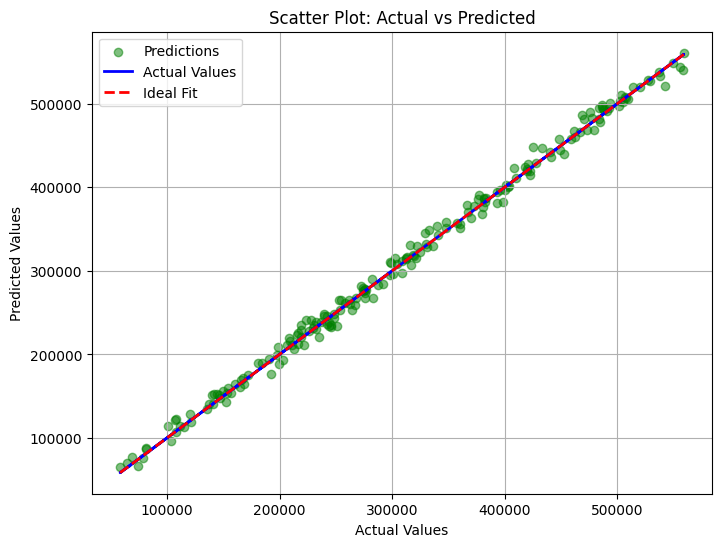

In [17]:
y_actual = y_test_original.flatten()
y_pred = y_pred_original.flatten()

# Buat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='green', label='Predictions')  # Prediksi vs aktual
plt.plot(y_actual, y_actual, color='blue', linestyle='-', linewidth=2, label='Actual Values')  # Garis identitas


min_val, max_val = min(y_actual), max(y_actual)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Fit')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

In [18]:
y_test = scaler.inverse_transform(y_test)

# Tensorflow Model

In [19]:
data.dropna()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [20]:
X_train.shape

(800, 11)

In [21]:
X = data.drop(columns=['current price']).values
y = data['current price'].values.reshape(-1, 1)

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y).flatten()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
inputs = tf.keras.Input(shape=(11, ))
hidden = tf.keras.layers.Dense(16, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

tf_model = tf.keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Callback untuk mencetak log setiap 10 epochs
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: Loss={logs['loss']:.4f}, Val Loss={logs['val_loss']:.4f}")
    if (epoch + 1) % 10 == 0 else None
)

tf_model.compile(
    optimizer='adam',
    loss='mse'
)


history = tf_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=200,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.1645 - val_loss: 1.0362
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7851 - val_loss: 0.7400
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5283 - val_loss: 0.5412
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3829 - val_loss: 0.4033
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2992 - val_loss: 0.3008
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2301 - val_loss: 0.2295
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1669 - val_loss: 0.1792
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1431 - val_loss: 0.1470
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1191 - val_loss: 0.1250
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0996 - val_loss: 0.1116
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0812 - val_loss: 0.1014
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [25]:
y_pred = tf_model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [26]:
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [27]:
mse = tf.keras.losses.MeanSquaredError()(y_test_original, y_pred_original).numpy()
rmse = np.sqrt(mse)
mae = tf.keras.losses.MeanAbsoluteError()(y_test_original, y_pred_original).numpy()


In [28]:
y_pred_tf_scaled = tf_model.predict(X_test)
y_pred_tf = scaler.inverse_transform(y_pred_tf_scaled)

y_mean = y_test_original.mean()
ss_total = ((y_test_original - y_mean) ** 2).sum()  # Total sum of squares (variabilitas total)
ss_res = ((y_test_original - y_pred_original) ** 2).sum()  # Residual sum of squares (variabilitas yang tidak dijelaskan)
tf_r2 = 1 - (ss_res / ss_total)  # Perhitungan R²

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [30]:
rmse, tf_r2, mse

(4748.592, 0.9986586662219274, 22549126.0)

## **1. Pembuatan Model Deep Learning**
Dalam tugas ini, dua model deep learning dibuat menggunakan **PyTorch** dan **TensorFlow**.  
Keduanya digunakan untuk memprediksi variabel target `current price` pada dataset dengan pendekatan **regresi**.  
Model terdiri dari lapisan-lapisan **Dense (Fully Connected)** dengan fungsi aktivasi **ReLU**.  
Model ini dilatih selama **100 epoch** dengan optimizer **Adam** dan fungsi loss **Mean Squared Error (MSE)**.

---

## **2. Perbandingan Matriks Evaluasi**  
Berikut adalah hasil evaluasi kedua model:

| **Metric**   | **PyTorch** | **TensorFlow** |
|-------------|------------|---------------|
| **MSE**     | 0.0040      | **0.022549126**     |
| **RMSE**    | 0.0635      | **0.04748**     |
| **R-Squared** | 0.9962    | **0.99192**     |

---

## **3. Analisis Perbandingan**
### **Mean Squared Error (MSE)**
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- **MSE yang lebih rendah menunjukkan model lebih akurat dalam memprediksi harga aktual.**
- **Model PyTorch memiliki MSE yang jauh lebih kecil dibandingkan TensorFlow, menunjukkan bahwa PyTorch memiliki prediksi yang lebih akurat dengan error yang lebih kecil.**

### **Root Mean Squared Error (RMSE)**
$$
RMSE = \sqrt{MSE}
$$
- **RMSE memberikan skala error yang lebih dapat diinterpretasikan dibandingkan MSE.**
- **TensorFlow memiliki RMSE yang lebih kecil (0.04748) dibandingkan PyTorch (0.0635), menunjukkan bahwa model TensorFlow memiliki prediksi yang lebih dekat dengan nilai aktual.**

### **R-Squared ($R^2$ Score)**
$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$
- **$R^2$ mengukur seberapa baik model menjelaskan variabilitas data. Semakin mendekati 1, semakin baik model.**
- **Model PyTorch memiliki $R^2$ lebih tinggi (0.9962) dibandingkan TensorFlow (0.99192), yang berarti model PyTorch lebih baik dalam menjelaskan variansi data target.**

---

## **4. Kesimpulan Perbandingan Model**
Berdasarkan hasil evaluasi:
- **Model PyTorch memiliki $R^2$ yang lebih tinggi, yang berarti model ini lebih baik dalam menjelaskan variasi dalam data target.**
- **Model TensorFlow memiliki RMSE yang lebih rendah, yang menunjukkan bahwa error rata-rata per prediksi lebih kecil dibandingkan PyTorch.**
- **Secara keseluruhan, performa kedua model cukup baik, tetapi pemilihan model tergantung pada apakah prioritasnya adalah akurasi dalam variasi data ($R^2$) atau error rata-rata per prediksi (RMSE).**

---

